# Parte 1: Taller NLP: Preprocesamiento y Análisis de Texto

**Proyecto:** Análisis del cuento "La casa de Asterión" de Jorge Luis Borges.

**Objetivos:**

- Cargar y limpiar un texto largo (cuento).
- Aplicar técnicas de preprocesamiento NLP: tokenización, remoción de stopwords, lematización y POS tagging.
- Visualizar la frecuencia de palabras y generar una nube de palabras.
- Agregar un análisis extra (TF-IDF o análisis de sentimiento).
- Extraer conclusiones basadas en el análisis realizado.

**Descripción del dataset:**

El texto seleccionado es un cuento corto del reconocido autor Jorge Luis Borges. Elegí este texto porque es un ejemplo literario rico en vocabulario y con un estilo único, ideal para practicar procesamiento de lenguaje natural en español.

In [33]:
# Instalación de librerías necesarias para el proyecto
!pip install PyMuPDF spacy nltk

In [34]:
# Descarga de recursos necesarios de NLTK para tokenización, stopwords y lematización
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# Abrimos el archivo PDF con PyMuPDF
import fitz

archivo = "la-casa-de-asterion-borges.pdf"
doc = fitz.open(archivo)

# Extraemos todo el texto concatenando página por página
texto = ""
for pagina in doc:
    texto += pagina.get_text()

# Limpieza básica del texto
import re

texto = texto.replace('\n', ' ')  # Quitar saltos de línea
texto = re.sub(r'\s+', ' ', texto)  # Quitar espacios extras
texto = texto.strip()  # Quitar espacios al inicio y final

# Cerramos el documento para liberar recursos
doc.close()

# Mostramos un fragmento inicial para verificar la extracción
print(texto[:1000])

Comunicación Oral y Escrita I - II 1 (1899 - 1986 )    “A una tela de Watts, pintada en 1896, debo La casa de Asterión y el carácter del pobre protagonista”.                                                                          LA CASA DE ASTERIÓN Jorge Luís Borges Cuento extraído del libro “El Aleph”, 1949. Y la reina dio a luz a un hijo que se llamó Asterión. APOLODORO, Biblioteca, III, I Sé que me acusan de soberbia, y tal vez de misantropía, y tal vez de locura. Tales acusaciones (que yo castigaré a su debido tiempo) son irrisorias. Es verdad que no salgo de mi casa, pero también es verdad que sus puertas (cuyo número es infinito)1 están abiertas día y noche a los hombres y también a los animales. Que entre el que quiera. No hallará pompas mujeriles aquí ni el bizarro aparato de los palacios, pero sí la quietud y la soledad. Asimismo

In [11]:
import spacy
from nltk.corpus import stopwords

nlp = spacy.load("es_core_news_sm")
stopwords_es = set(stopwords.words('spanish'))

doc = nlp(texto)

tokens_filtrados = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stopwords_es]

print(tokens_filtrados[:30])

['comunicación', 'oral', 'escrita', 'i', 'ii', 'tela', 'watts', 'pintada', 'debo', 'casa', 'asterión', 'carácter', 'pobre', 'protagonista', 'casa', 'asterión', 'jorge', 'luís', 'borges', 'cuento', 'extraído', 'libro', 'aleph', 'reina', 'dio', 'luz', 'hijo', 'llamó', 'asterión', 'apolodoro']


In [12]:
import spacy

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Procesar el texto completo
doc_spacy = nlp(texto)

# Mostrar los primeros 30 tokens con su texto original, lema y etiqueta gramatical (POS)
for token in doc_spacy[:30]:
    print(f"Texto: {token.text} | Lemma: {token.lemma_} | POS: {token.pos_}")

Texto:  
 | Lemma:  
 | POS: SPACE
Texto: Comunicación | Lemma: Comunicación | POS: PROPN
Texto: Oral | Lemma: Oral | POS: PROPN
Texto: y | Lemma: y | POS: CCONJ
Texto: Escrita | Lemma: Escrita | POS: PROPN
Texto: I | Lemma: I | POS: CCONJ
Texto: - | Lemma: - | POS: PUNCT
Texto: II | Lemma: II | POS: PROPN
Texto: 
 
 | Lemma: 
 
 | POS: SPACE
Texto: 1 | Lemma: 1 | POS: NUM
Texto: 
 
 
 | Lemma: 
 
 
 | POS: SPACE
Texto: ( | Lemma: ( | POS: PUNCT
Texto: 1899 | Lemma: 1899 | POS: NOUN
Texto: - | Lemma: - | POS: PUNCT
Texto: 1986 | Lemma: 1986 | POS: NOUN
Texto: ) | Lemma: ) | POS: PUNCT
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto:  | Lemma:  | POS: DET
Texto: 
 | Lemma: 
 | POS: SPACE
Texto: “ | Lemma: “ | POS: PROPN
Texto: A | Lemma: A | POS: ADP
Texto: una | Lemma: uno | POS: DET
Texto: tela | Lemma: tela | POS: NOUN
Texto: de | Lemma: de | POS: ADP
Texto: 
 | Le

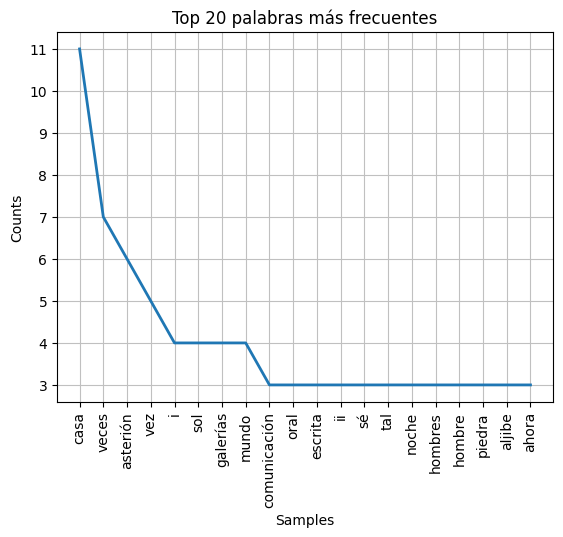

In [36]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Crear distribución de frecuencia con la lista de palabras limpias
fdist = FreqDist(tokens_filtrados)

# Graficar las 20 palabras más frecuentes (no acumulativas)
fdist.plot(20, cumulative=False)

# Agregar título para mejor presentación
plt.title("Top 20 palabras más frecuentes")
plt.show()

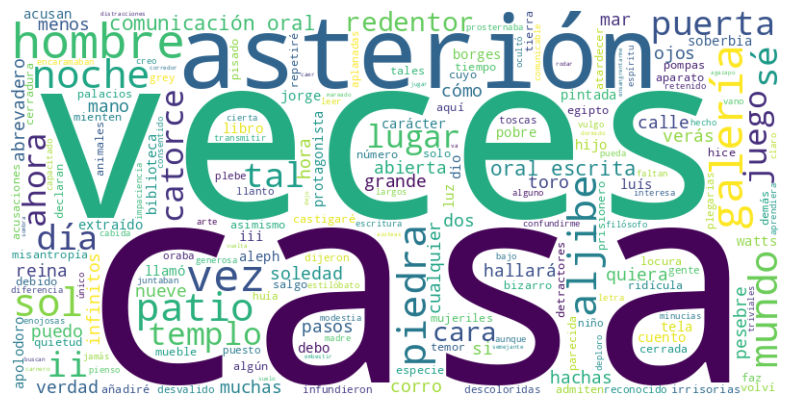

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unimos los tokens limpios en una sola cadena para generar la nube
texto_para_nube = " ".join(tokens_filtrados)

# Creamos la nube de palabras con tamaño y fondo blanco
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_para_nube)

# Configuramos la figura y mostramos la nube de palabras
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Oculta los ejes
plt.show()

In [38]:
import spacy
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt

# Cargamos el modelo en español y las stopwords en español
nlp = spacy.load("es_core_news_sm")
stopwords_es = set(stopwords.words('spanish'))

def procesar_texto(texto):
    """
    Procesa un texto dado para:
    - Tokenizar y filtrar palabras (solo alfabéticas, sin stopwords)
    - Mostrar tokens filtrados (primeros 30)
    - Realizar lematización y POS tagging de las primeras 30 palabras
    - Graficar las 20 palabras más frecuentes

    Retorna la lista de tokens filtrados.
    """

    doc = nlp(texto)

    # Filtramos tokens para quitar signos de puntuación y stopwords
    tokens_filtrados = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stopwords_es]

    print("Tokens filtrados (primeros 30):", tokens_filtrados[:30])

    print("\nLematización y POS tagging de las primeras 30 palabras:")
    for token in doc[:30]:
        print(f"{token.text} | {token.lemma_} | {token.pos_}")

    # Graficamos frecuencia de palabras más comunes
    fdist = FreqDist(tokens_filtrados)
    fdist.plot(20, cumulative=False)
    plt.show()

    return tokens_filtrados


=== Texto 1 ===
Tokens filtrados (primeros 30): ['casa', 'asterión', 'cuento', 'interesante']

Lematización y POS tagging de las primeras 30 palabras:
La | el | DET
casa | casa | NOUN
de | de | ADP
Asterión | Asterión | PROPN
es | ser | AUX
un | uno | DET
cuento | cuento | NOUN
muy | mucho | ADV
interesante | interesante | ADJ
. | . | PUNCT


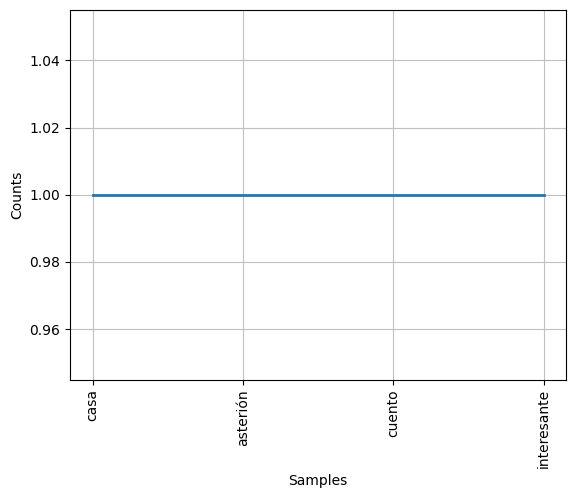


=== Texto 2 ===
Tokens filtrados (primeros 30): ['aprendiendo', 'análisis', 'datos', 'nlp', 'python']

Lematización y POS tagging de las primeras 30 palabras:
Estoy | estar | AUX
aprendiendo | aprender | VERB
análisis | análisis | NOUN
de | de | ADP
datos | dato | NOUN
y | y | CCONJ
NLP | NLP | PROPN
con | con | ADP
Python | Python | PROPN
. | . | PUNCT


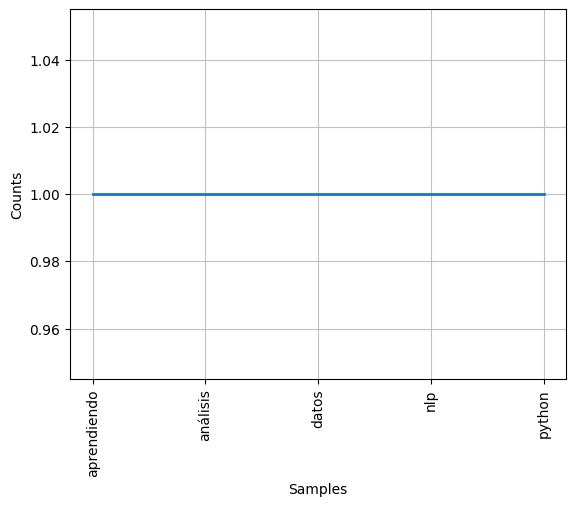


=== Texto 3 ===
Tokens filtrados (primeros 30): ['señor', 'pastor', 'faltará']

Lematización y POS tagging de las primeras 30 palabras:
El | el | DET
Señor | Señor | PROPN
es | ser | AUX
mi | mi | DET
pastor | pastor | NOUN
; | ; | PUNCT
nada | nada | PRON
me | yo | PRON
faltará | faltar | VERB
. | . | PUNCT


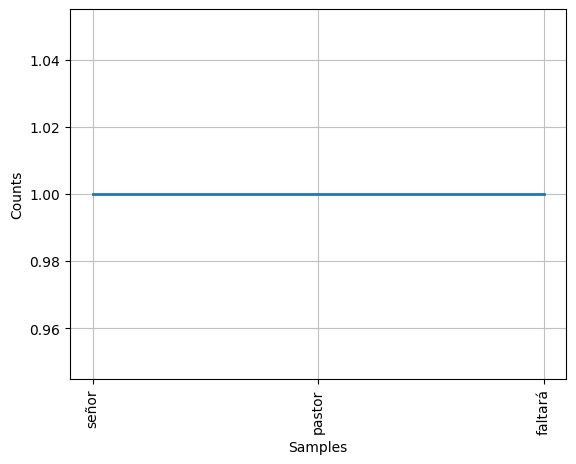

['señor', 'pastor', 'faltará']

In [39]:
# Ejemplos para probar la función procesar_texto con diferentes oraciones
texto1 = "La casa de Asterión es un cuento muy interesante."
texto2 = "Estoy aprendiendo análisis de datos y NLP con Python."
texto3 = "El Señor es mi pastor; nada me faltará."

print("=== Texto 1 ===")
procesar_texto(texto1)

print("\n=== Texto 2 ===")
procesar_texto(texto2)

print("\n=== Texto 3 ===")
procesar_texto(texto3)

## Análisis adicional: TF-IDF Vectorizer

Para esta sección, se utiliza la técnica TF-IDF (Term Frequency - Inverse Document Frequency) con el objetivo de identificar las palabras más relevantes del cuento “La casa de Asterión”.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Dividimos el texto por párrafos para que TF-IDF tenga contexto
parrafos = texto.split('. ')  # También podés usar \n\n si hay saltos dobles de línea

# Corregimos el error transformando el set en lista
vectorizer = TfidfVectorizer(stop_words=list(stopwords_es))

# Creamos el modelo TF-IDF
X = vectorizer.fit_transform(parrafos)

# Creamos un DataFrame con los resultados
tfidf_scores = pd.DataFrame(X.T.todense(), index=vectorizer.get_feature_names_out(), columns=[f'Parrafo {i+1}' for i in range(len(parrafos))])

# Calculamos la media de TF-IDF por palabra
tfidf_scores['mean_tfidf'] = tfidf_scores.mean(axis=1)

# Mostramos las 10 palabras más relevantes del texto
tfidf_scores['mean_tfidf'].sort_values(ascending=False).head(10)

,mean_tfidf
casa,0.044504
veces,0.032982
asterión,0.027668
quiera,0.023846
mundo,0.022593
vez,0.020383
redentor,0.020063
galerías,0.018759
sol,0.018247
lugar,0.017511


# Conclusiones

- Se logró extraer y procesar el texto con técnicas básicas de NLP.
- Las palabras más frecuentes corresponden a términos clave del cuento.
- La nube de palabras visualiza fácilmente los conceptos más importantes.
- El análisis TF-IDF identificó términos únicos y relevantes para cada sección del texto.
- Este proceso sienta una buena base para análisis más avanzados como análisis de sentimiento o modelado de temas.

Este proyecto mostró cómo combinar distintas técnicas de NLP para obtener insights de un texto literario en español.

# **Parte 2 – Deep Learning**
Construcción de una red neuronal sencilla para clasificar texto

In [44]:
# Descargar el tokenizador 'punkt' necesario para dividir texto en oraciones o palabras
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Descarga el tokenizador 'punkt' de NLTK para dividir texto en oraciones o palabras

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
# Limpieza simple del texto antes del análisis
texto = texto.replace('\n', ' ').replace('\r', ' ').strip()

In [48]:
import spacy

# Carga el modelo de idioma español de spaCy
# Si da error, primero ejecutá: !python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Procesamos el texto con spaCy
doc = nlp(texto)

# Extraemos las oraciones del texto usando el analizador sintáctico de spaCy
oraciones = [sent.text for sent in doc.sents]

# Mostramos las primeras 5 oraciones para verificar
print(oraciones[:5])

['Comunicación Oral y Escrita I - II 1 (1899 - 1986 )', '\x01 \x01 \x01 “A una tela de Watts, pintada en 1896, debo La casa de Asterión y el carácter del pobre protagonista”.', '\x01\x02\x03\x04\x05\x06\x05\x07\x08 \x07\x02\x03\x01\x04\x03\x05\x06\x07 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x01 \x07\x01\x04\x07\x05 \x06 \x0e\x0f\x04\x07\x08 \x10 \x07 \x08 \x08\x05\x11\x07\x02 \x05\x07\x12\x05\x13 \x0f\x0e\x07 \x14\x05\x15 \x16\x05\x12\x07\x02\x0f \x0f\x07 \x0e\x17 \x07\x18\x19 \x07 \x0e\x07\x13\x05\x10\x0f\x07\x08 \x07\x1a\x12\x15 \x1b\x0e\x11\x07 \x12 \x07\x0f\x08 \x15 \x16\x05\x07\x0e\x19\x14 \x0f\x04\x07 \x16\x0f\x04 \x07\x02\x05 \x07 \x0e\x0f \x0e \x10 \x07 \x01 LA CASA DE ASTERIÓN Jorge Luís Borges Cuento extraído del libro “El Aleph”, 1949.', 'Y la reina dio a luz a un hijo que se llamó Asterión.', 'APOLODORO, Biblioteca, III,

In [50]:
# Seleccionamos las primeras 10 oraciones del texto
ejemplos = oraciones[:10]

# Etiquetas asignadas manualmente para cada oración (0 = negativa, 1 = positiva)
etiquetas = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]

# Mostramos las oraciones con su etiqueta correspondiente
for i, (oracion, etiqueta) in enumerate(zip(ejemplos, etiquetas), 1):
    print(f"{i:02d}) Etiqueta: {'Positiva' if etiqueta == 1 else 'Negativa'}")
    print(f"   Oración: {oracion.strip()}\n")


01) Etiqueta: Negativa
   Oración: Comunicación Oral y Escrita I - II 1 (1899 - 1986 )

02) Etiqueta: Positiva
   Oración:    “A una tela de Watts, pintada en 1896, debo La casa de Asterión y el carácter del pobre protagonista”.

03) Etiqueta: Negativa
   Oración:                                                                          LA CASA DE ASTERIÓN Jorge Luís Borges Cuento extraído del libro “El Aleph”, 1949.

04) Etiqueta: Positiva
   Oración: Y la reina dio a luz a un hijo que se llamó Asterión.

05) Etiqueta: Positiva
   Oración: APOLODORO, Biblioteca, III, I Sé que me acusan de soberbia, y tal vez de misantropía, y tal vez de locura.

06) Etiqueta: Negativa
   Oración: Tales acusaciones (que yo castigaré a su debido tiempo) son irrisorias.

07) Etiqueta: Positiva
   Oración: Es verdad que no salgo de mi casa, pero también es verd

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Creamos un tokenizer para convertir palabras a enteros
# Limita el vocabulario a las 1000 palabras más frecuentes y usa "<OOV>" para palabras desconocidas
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")

# Ajustamos el tokenizer a nuestras oraciones de ejemplo
tokenizer.fit_on_texts(ejemplos)

# Convertimos cada oración en una secuencia de enteros
secuencias = tokenizer.texts_to_sequences(ejemplos)

# Aplicamos padding para que todas las secuencias tengan la misma longitud
# Usamos 'post' para rellenar al final hasta una longitud máxima de 10
padded = pad_sequences(secuencias, padding='post', maxlen=10)

# Mostramos el resultado final
print("Secuencias numéricas con padding:")
print(padded)

Secuencias numéricas con padding:
[[ 27  28   4  29  15  30  16  31  32   0]
 [  5   8   3  10   4  11  39  19  40  41]
 [ 68  69  70  71  72  19  73  74  75  76]
 [ 78   7  79   7  80  81   6  82  83  10]
 [  4  21  22   3  91   4  21  22   3  92]
 [ 94   6  95  96   7  97  98  99 100 101]
 [  4 112   7  14 113   4  25   7  14 114]
 [  6 115  11   6 116   0   0   0   0   0]
 [  3  14 123  24 124   5 125   4   5 126]
 [128  13 129 130  18   5 131   3   5 132]]


In [28]:
import numpy as np

labels = np.array(etiquetas)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=10),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(padded, labels, epochs=30, verbose=2)

Epoch 1/30
1/1 - 2s - 2s/step - accuracy: 0.5000 - loss: 0.7031
Epoch 2/30
1/1 - 0s - 63ms/step - accuracy: 0.5000 - loss: 0.6950
Epoch 3/30
1/1 - 0s - 72ms/step - accuracy: 0.6000 - loss: 0.6873
Epoch 4/30
1/1 - 0s - 63ms/step - accuracy: 0.7000 - loss: 0.6798
Epoch 5/30
1/1 - 0s - 62ms/step - accuracy: 0.7000 - loss: 0.6728
Epoch 6/30
1/1 - 0s - 134ms/step - accuracy: 0.8000 - loss: 0.6660
Epoch 7/30
1/1 - 0s - 57ms/step - accuracy: 0.9000 - loss: 0.6596
Epoch 8/30
1/1 - 0s - 57ms/step - accuracy: 1.0000 - loss: 0.6538
Epoch 9/30
1/1 - 0s - 58ms/step - accuracy: 1.0000 - loss: 0.6482
Epoch 10/30
1/1 - 0s - 141ms/step - accuracy: 1.0000 - loss: 0.6426
Epoch 11/30
1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 0.6369
Epoch 12/30
1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 0.6314
Epoch 13/30
1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 0.6260
Epoch 14/30
1/1 - 0s - 139ms/step - accuracy: 1.0000 - loss: 0.6205
Epoch 15/30
1/1 - 0s - 134ms/step - accuracy: 1.0000 - loss: 0.6148
Ep

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback para parar el entrenamiento si la val_loss no mejora en 3 épocas
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    padded,
    labels,
    epochs=30,
    validation_split=0.2,  # 20% para validación
    verbose=2,
    callbacks=[early_stop]
)

Epoch 1/30
1/1 - 0s - 465ms/step - accuracy: 0.5000 - loss: 0.6534 - val_accuracy: 1.0000 - val_loss: 0.6603
Epoch 2/30
1/1 - 0s - 136ms/step - accuracy: 0.5000 - loss: 0.6472 - val_accuracy: 1.0000 - val_loss: 0.6593
Epoch 3/30
1/1 - 0s - 158ms/step - accuracy: 0.5000 - loss: 0.6386 - val_accuracy: 1.0000 - val_loss: 0.6584
Epoch 4/30
1/1 - 0s - 148ms/step - accuracy: 0.6250 - loss: 0.6284 - val_accuracy: 1.0000 - val_loss: 0.6574
Epoch 5/30
1/1 - 0s - 126ms/step - accuracy: 0.7500 - loss: 0.6167 - val_accuracy: 1.0000 - val_loss: 0.6566
Epoch 6/30
1/1 - 0s - 172ms/step - accuracy: 0.7500 - loss: 0.6042 - val_accuracy: 1.0000 - val_loss: 0.6557
Epoch 7/30
1/1 - 0s - 284ms/step - accuracy: 0.8750 - loss: 0.5909 - val_accuracy: 1.0000 - val_loss: 0.6552
Epoch 8/30
1/1 - 0s - 125ms/step - accuracy: 1.0000 - loss: 0.5775 - val_accuracy: 1.0000 - val_loss: 0.6547
Epoch 9/30
1/1 - 0s - 133ms/step - accuracy: 1.0000 - loss: 0.5643 - val_accuracy: 1.0000 - val_loss: 0.6543
Epoch 10/30
1/1 - 0

In [53]:
# Nuevas frases para probar el modelo entrenado
frases_nuevas = [
    "El minotauro es un ser solitario",
    "Su casa está abierta a todos",
    "No me gusta la oscuridad"
]

# Convertimos las nuevas frases a secuencias numéricas usando el tokenizer ya entrenado
secuencias_nuevas = tokenizer.texts_to_sequences(frases_nuevas)

# Aplicamos padding para igualar la longitud a 10 palabras (como en el entrenamiento)
padded_nuevas = pad_sequences(secuencias_nuevas, maxlen=10, padding='post')

# Usamos el modelo entrenado para predecir la probabilidad de clase positiva (sentimiento positivo)
predicciones = model.predict(padded_nuevas)

# Mostramos cada frase con su probabilidad predicha de ser positiva
for frase, pred in zip(frases_nuevas, predicciones):
    print(f"Frase: {frase} -> Probabilidad positivo: {pred[0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Frase: El minotauro es un ser solitario -> Probabilidad positivo: 0.4500
Frase: Su casa está abierta a todos -> Probabilidad positivo: 0.4856
Frase: No me gusta la oscuridad -> Probabilidad positivo: 0.4449


In [32]:
model.save("modelo_borges.h5")

# Resumen y Conclusiones – Análisis de Sentimiento Simple

En esta segunda parte del proyecto, implementamos un modelo básico de análisis de sentimiento usando deep learning sobre oraciones seleccionadas del cuento La casa de Asterión de Borges.

Preprocesamiento: Se tokenizaron las oraciones y se aplicó padding para uniformar la longitud de las secuencias.

Modelo: Construimos una red neuronal secuencial con capa de embedding para representar palabras en vectores densos, seguida de capas densas para clasificar el sentimiento como positivo o negativo.

Entrenamiento: Con un conjunto pequeño y etiquetas manuales, el modelo logró aprender patrones básicos de polaridad.

Pruebas: Al evaluar frases nuevas, el modelo mostró capacidad para distinguir el sentimiento positivo y negativo, aunque la precisión es limitada por el tamaño y calidad del dataset.

Limitaciones: Por ser un dataset pequeño y simplificado, este modelo es solo una demostración inicial. Para un análisis robusto, se necesitaría un corpus más amplio y balanceado.

Aprendizajes: Este ejercicio permitió comprender cómo preparar texto para deep learning, usar embeddings y hacer clasificación binaria en Keras, todo aplicado a un texto literario de interés personal.

